# Labb 2

**Syftet** med den här laborationen är att använda verktygen vi lärt oss i Python för att implementera en
förenklad maskininlärningsalgoritm.

I den här laborationen finns (simulerad) data på Pichus och Pikachus längder och bredder. Man ska skapa en
algoritm, som baserat på den givna datan, kana avgöra om en ny datapunkt ska klassificeras som Pichu
eller Pikachu.


## Split data into datapoints (datapoints and testpoints)

In [18]:
# Import of packages needed to make graphs and euclidian distance 
import matplotlib.pyplot as plt

with open("Data/datapoints.txt", "r") as data_read:
    lines = data_read.readlines()
    lines = lines[1:] #takes away first line
#split the lines list one by one wherever a comma followed by a space appears, [0] access the first element a.s.o
pokemon_width = [float(line.split(", ")[0]) for line in lines] 
pokemon_height = [float(line.split(", ")[1]) for line in lines]
pokemon_type = [int(line.split(", ")[2]) for line in lines]

 #Adding testpoints and split them in lines and then x and y
test_lines = []
 
with open("Data/testpoints.txt", "r") as test_read:
        for line in test_read:
            line = line.strip()
            if "(" in line and ")" in line:
                 coordinates = line.split("(")[1].split(")")[0]
                 x, y = map(float, coordinates.split(","))
                 test_lines.append((x, y))

# Test_lines contain a list of tuples, each tuple represents (x, y) coordinates of a test point.
x_coordinates, y_coordinates = zip(*test_lines)


## Plott datapoints and testpoints

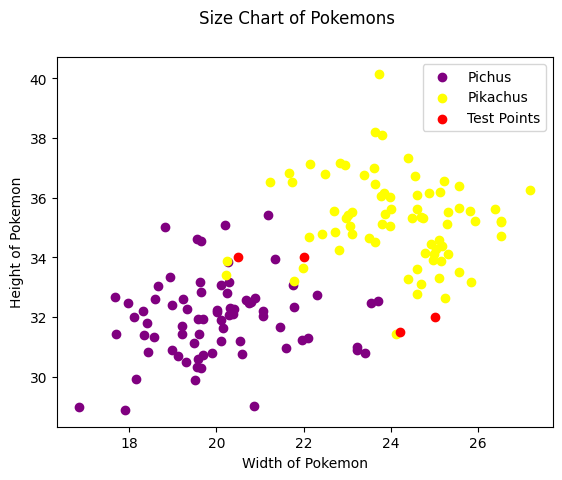

In [11]:
# Create separate scatter plots for Pichus and Pikachus with different colors
plt.scatter(
    [pokemon_width[i] for i, pokemon_type in enumerate(pokemon_type) if pokemon_type == 0],
    [pokemon_height[i] for i, pokemon_type in enumerate(pokemon_type) if pokemon_type == 0],
    c='purple',
    label='Pichus'
)

plt.scatter(
    [pokemon_width[i] for i, pokemon_type in enumerate(pokemon_type) if pokemon_type == 1],
    [pokemon_height[i] for i, pokemon_type in enumerate(pokemon_type) if pokemon_type == 1],
    c='yellow',
    label='Pikachus'
)
 # Plotting testpoints
plt.scatter(x_coordinates, y_coordinates, marker='o', label='Test Points', color='red'
            )

# Adding titles and labels
plt.suptitle("Size Chart of Pokemons")
plt.xlabel("Width of Pokemon")
plt.ylabel("Height of Pokemon")

# Adding the legend for both Pichus, Pikachus and test points
plt.legend()

# Display the plot
plt.show()

## Write type

In [19]:
import math

# Define a function to calculate Euclidean distance between two points
def euclidean_distance(point1, point2):
    distance = 0
    for i in range(len(point1)):
        distance += (point1[i] - point2[i]) ** 2
    return math.sqrt(distance)

# Define the training data
pokemon_data = [(w, h) for w, h in zip(pokemon_width, pokemon_height)]

# Number of neighbors to find (k)
k = 1

# Define the test data
test_lines = [(width, height) for width, height in test_data]

# Perform k-nearest neighbors classification
for test_point in test_lines:
    nearest_neighbors = sorted(pokemon_data, key=lambda x: euclidean_distance(test_point, x))[:k]
    # Assuming you have a list 'pokemon_type' that contains 1 for 'Pikachu' and 0 for 'Pichu'
    nearest_labels = [pokemon_type[pokemon_data.index(neighbor)] for neighbor in nearest_neighbors]
    classification = 'Pikachu' if sum(nearest_labels) > k // 2 else 'Pichu'
    print(f"Sample with (width, height): {test_point} classified as {classification}.")


NameError: name 'test_data' is not defined

### Task 1

Låt användaren mata in en testpunkt och låt algoritmen avgöra dess klass. Ta med felhanteringen som tar hand om negativa tal och icke-numeriska inputs. Se
till att ha användarvänliga felmeddelanden.

Error: Please enter valid numeric values for width and height.


NameError: name 'user_width' is not defined

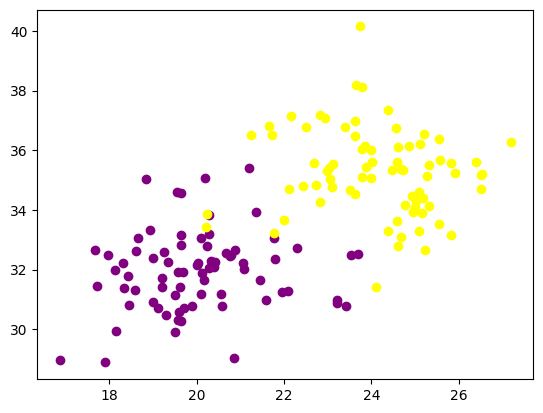

In [20]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.neighbors import NearestNeighbors

with open("Data/datapoints.txt", "r") as data_read:
    lines = data_read.readlines()
    lines = lines[1:] 

pokemon_width = [float(line.split(", ")[0]) for line in lines] 
pokemon_height = [float(line.split(", ")[1]) for line in lines]
pokemon_type = [int(line.split(", ")[2]) for line in lines]

pokemon_data = np.array(list(zip(pokemon_width, pokemon_height)))

# Number of neighbors to find (k)
k = 1
knn = NearestNeighbors(n_neighbors=k)
knn.fit(pokemon_data)

# Input a test point from the user
try:
    user_width = float(input("Enter the width of the test point: "))
    user_height = float(input("Enter the height of the test point: "))

    # Check for negative values
    if user_width < 0 or user_height < 0:
        print("Error: Please enter non-negative values for width and height.")
    else:
        user_test_point = np.array([[user_width, user_height]])

  # Find the nearest neighbor for the user's test point
        indices = knn.kneighbors(user_test_point, return_distance=False)

        nearest_neighbor_class = 'Pikachu' if pokemon_type[indices[0][0]] == 1 else 'Pichu'

        print(f"The test point with (width, height): ({user_width}, {user_height}) is classified as {nearest_neighbor_class}")
except ValueError:
    print("Error: Please enter valid numeric values for width and height.")
    #https://www.w3schools.com/python/python_try_except.asp

# Create separate scatter plots for Pichus and Pikachus with different colors
plt.scatter(
    [pokemon_width[i] for i, pokemon_type in enumerate(pokemon_type) if pokemon_type == 0],
    [pokemon_height[i] for i, pokemon_type in enumerate(pokemon_type) if pokemon_type == 0],
    c='purple',
    label='Pichus'
)
plt.scatter(
    [pokemon_width[i] for i, pokemon_type in enumerate(pokemon_type) if pokemon_type == 1],
    [pokemon_height[i] for i, pokemon_type in enumerate(pokemon_type) if pokemon_type == 1],
    c='yellow',
    label='Pikachus'
)
 # Plotting user_testpoints
plt.scatter(user_width, user_height, marker='o', label=' Your Test Point', color='red')

# Adding titles and labels
plt.suptitle("Size Chart of Pokemons")
plt.xlabel("Width of Pokemon")
plt.ylabel("Height of Pokemon")
plt.legend()

### Task 2 
Den approachen vi använt med närmaste punkten kan klassificera fel när punkterna för respektive
klass går in i varandra. Nu ska du istället välja de tio närmaste punkterna till din testpunkt. Den klass
testpunkten tillhör avgörs av majoritetsröstning av de närmaste punkterna.


The test point with (width, height): (30.0, 30.0) is classified as Pichu
[[0.15317344 0.16102809 0.22167319 0.29106578 0.31766527 0.39333674
  0.40174271 0.43077788 0.43814425 0.48900976]] [[ 81  23 131  97  90  57  39 142  55 141]]


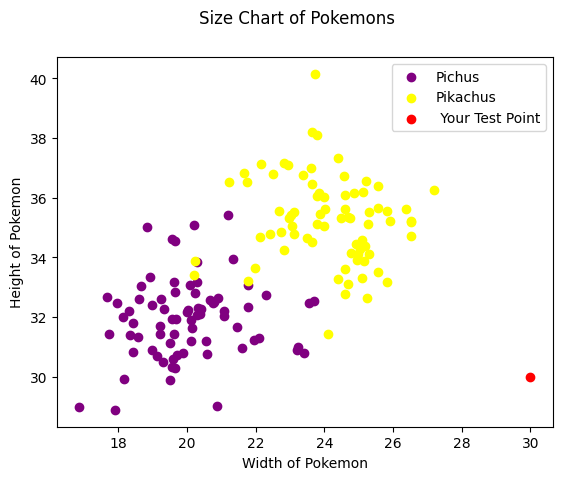

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.neighbors import NearestNeighbors

with open("Data/datapoints.txt", "r") as data_read:
    lines = data_read.readlines()
    lines = lines[1:] #takes away first line
#split the lines list one by one wherever a comma followed by a space appears, [0] access the first element a.s.o
pokemon_width = [float(line.split(", ")[0]) for line in lines] 
pokemon_height = [float(line.split(", ")[1]) for line in lines]
pokemon_type = [int(line.split(", ")[2]) for line in lines]

# Combine width and height into a single NumPy array for the training data
pokemon_data = np.array(list(zip(pokemon_width, pokemon_height)))

k = 10
knn = NearestNeighbors(n_neighbors=k)
knn.fit(pokemon_data)

# Input a test point from the user
try:
    user_width = float(input("Enter the width of the test point: "))
    user_height = float(input("Enter the height of the test point: "))

    # Check for negative values
    if user_width < 0 or user_height < 0:
        print("Error: Please enter non-negative values for width and height.")
    else:
        user_test_point = np.array([[user_width, user_height]])

  # Find the nearest neighbor for the user's test point
        distances, indices = knn.kneighbors(test_point)

        majority_class = 'Pikachu' if np.mean([pokemon_type[i] for i in indices[0]]) > 0.5 else 'Pichu'
        
        print(f"The test point with (width, height): ({user_width}, {user_height}) is classified as {majority_class}")
except ValueError:
    print("Error: Please enter valid numeric values for width and height.")
    #https://www.w3schools.com/python/python_try_except.asp

# Create separate scatter plots for Pichus and Pikachus with different colors
plt.scatter(
    [pokemon_width[i] for i, pokemon_type in enumerate(pokemon_type) if pokemon_type == 0],
    [pokemon_height[i] for i, pokemon_type in enumerate(pokemon_type) if pokemon_type == 0],
    c='purple',
    label='Pichus'
)
plt.scatter(
    [pokemon_width[i] for i, pokemon_type in enumerate(pokemon_type) if pokemon_type == 1],
    [pokemon_height[i] for i, pokemon_type in enumerate(pokemon_type) if pokemon_type == 1],
    c='yellow',
    label='Pikachus'
)
 # Plotting user_testpoints
plt.scatter(user_width, user_height, marker='o', label=' Your Test Point', color='red')

# Adding titles and labels
plt.suptitle("Size Chart of Pokemons")
plt.xlabel("Width of Pokemon")
plt.ylabel("Height of Pokemon")
plt.legend()

print(distances, indices)

# Bonusuppgifter (frivilliga)


### Task 3
Dela in ursprungsdatan slumpmässigt så att:
- 100 är träningsdata (50 Pikachu, 50 Pichu)
- 50 är testdata (25 Pikachu, 25 Pichu)

### Task 4

Beräkna noggranheten genom följande formel:
accuracy = (#TP+#TN)/(total)
- **TP** = Pikachu actual and Pikachu predicted 
- **FP** = Pichu actual and Pikachu predicted
- **FN** = Pikachu actual and Pichu predicted
- **TN** = Pichu actual and Pichu predicted

### Upprepa uppgift 3 och 4 tio gånger, plotta en graf över accuracy och rapportera medelaccuracy.